In [39]:
# Load libraries
library(DiffBind)
library(BiocParallel)
library(dplyr)
library(TxDb.Athaliana.BioMart.plantsmart51)
library(ChIPseeker)

# Set options
options(stringsAsFactors = F)
Fold_cutoff <- 1
FDR_cutoff <- 0.05


In [48]:
bamReads = list.files("/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam/", pattern = "bam$", full.names = T)
bamReads

[1] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12A_clean_filtered.bam"
[2] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12B_clean_filtered.bam"
[3] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12C_clean_filtered.bam"
[4] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM1_clean_filtered.bam" 
[5] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM2_clean_filtered.bam" 
[6] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM3_clean_filtered.bam"

In [49]:
Peaks = list.files("/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks/", pattern = 'narrowPeak$', full.names = T)
Peaks

[1] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//C12A_clean_filtered_peaks.narrowPeak"
[2] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//C12B_clean_filtered_peaks.narrowPeak"
[3] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//C12C_clean_filtered_peaks.narrowPeak"
[4] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//DM1_clean_filtered_peaks.narrowPeak" 
[5] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//DM2_clean_filtered_peaks.narrowPeak" 
[6] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//DM3_clean_filtered_peaks.narrowPeak"

In [50]:
# Create a sample info data frame
sample_info <- data.frame(
  SampleID = c('C12_1', 'C12_2', 'C12_3', 'DM_1', 'DM_2', 'DM_3'),
  Condition = rep(c('control', 'test'), each = 3),
  Replicate = rep(1:3, 2),
  bamReads = bamReads,
  Peaks = Peaks,
  PeakCaller = "narrow",
  stringsAsFactors = F
)


In [51]:
sample_info

SampleID,Condition,Replicate,bamReads,Peaks,PeakCaller
<chr>,<chr>,<int>,<chr>,<chr>,<chr>
C12_1,control,1,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12A_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//C12A_clean_filtered_peaks.narrowPeak,narrow
C12_2,control,2,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12B_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//C12B_clean_filtered_peaks.narrowPeak,narrow
C12_3,control,3,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12C_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//C12C_clean_filtered_peaks.narrowPeak,narrow
DM_1,test,1,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM1_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//DM1_clean_filtered_peaks.narrowPeak,narrow
DM_2,test,2,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM2_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//DM2_clean_filtered_peaks.narrowPeak,narrow
DM_3,test,3,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM3_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks//DM3_clean_filtered_peaks.narrowPeak,narrow


In [52]:
# Import data
dba_meta <- dba(minOverlap = 1, sampleSheet = sample_info)


C12_1   control  1 narrow

C12_2   control  2 narrow

C12_3   control  3 narrow

DM_1   test  1 narrow

DM_2   test  2 narrow

DM_3   test  3 narrow



In [53]:
# Count reads
dba_count <- dba.count(dba_meta, minOverlap = 1)


Computing summits...

Re-centering peaks...



In [54]:
dba_count

6 Samples, 60913 sites in matrix:
     ID Condition Replicate    Reads FRiP
1 C12_1   control         1 69772433 0.44
2 C12_2   control         2 49161614 0.44
3 C12_3   control         3 40808874 0.43
4  DM_1      test         1 56048498 0.39
5  DM_2      test         2 66216104 0.39
6  DM_3      test         3 58854332 0.39

In [55]:
# Plot heatmap and PCA
pdf("./diffbind_results/Sample_Cor.pdf", width = 8, height = 7)
dba.plotHeatmap(dba_count, RowAttributes = DBA_TISSUE, ColAttributes = F)
dba.plotPCA(dba_count)
dev.off()


png 
  2

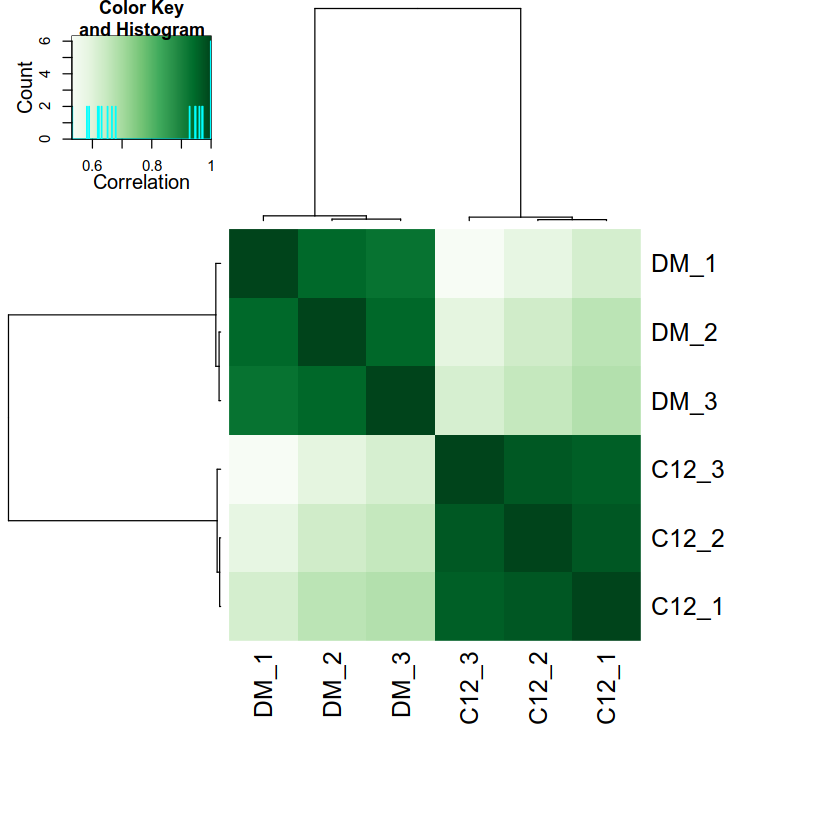

In [56]:
dba.plotHeatmap(dba_count, RowAttributes = DBA_TISSUE, ColAttributes = F)

In [80]:
dba_count <- dba.normalize(dba_count)
dba_count
norm <- dba.normalize(dba_count_norm, bRetrieve=TRUE)
norm

6 Samples, 60913 sites in matrix:
     ID Condition Replicate    Reads FRiP
1 C12_1   control         1 69772433 0.44
2 C12_2   control         2 49161614 0.44
3 C12_3   control         3 40808874 0.43
4  DM_1      test         1 56048498 0.39
5  DM_2      test         2 66216104 0.39
6  DM_3      test         3 58854332 0.39

$norm.method
[1] "lib"

$norm.factors
[1] 1.2281650 0.8653643 0.7183357 0.9865903 1.1655649 1.0359798

$lib.method
[1] "full"

$lib.sizes
[1] 69772433 49161614 40808874 56048498 66216104 58854332

$control.subtract
[1] TRUE

$filter.value
[1] 1

In [81]:
normlibs <- cbind(FullLibSize=norm$lib.sizes, NormFacs=norm$norm.factors, NormLibSize=round(norm$lib.sizes/norm$norm.factors))
# rownames(normlibs) <- info$ID
normlibs

FullLibSize,NormFacs,NormLibSize
69772433,1.2281650,56810309
49161614,0.8653643,56810309
40808874,0.7183357,56810309
56048498,0.9865903,56810309
66216104,1.1655649,56810309
58854332,1.0359798,56810309


In [82]:
# Perform differential analysis
dba_contrast <- dba.contrast(dba_count, group1 = dba_count$masks[["control"]], group2 = dba_count$masks[["test"]], name1 = "control", name2 = "test")
dba_diff <- dba.analyze(dba_contrast)


Applying Blacklist/Greylists...

No genome detected.

Analyzing...

converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>
1,control,3,test,3,27134


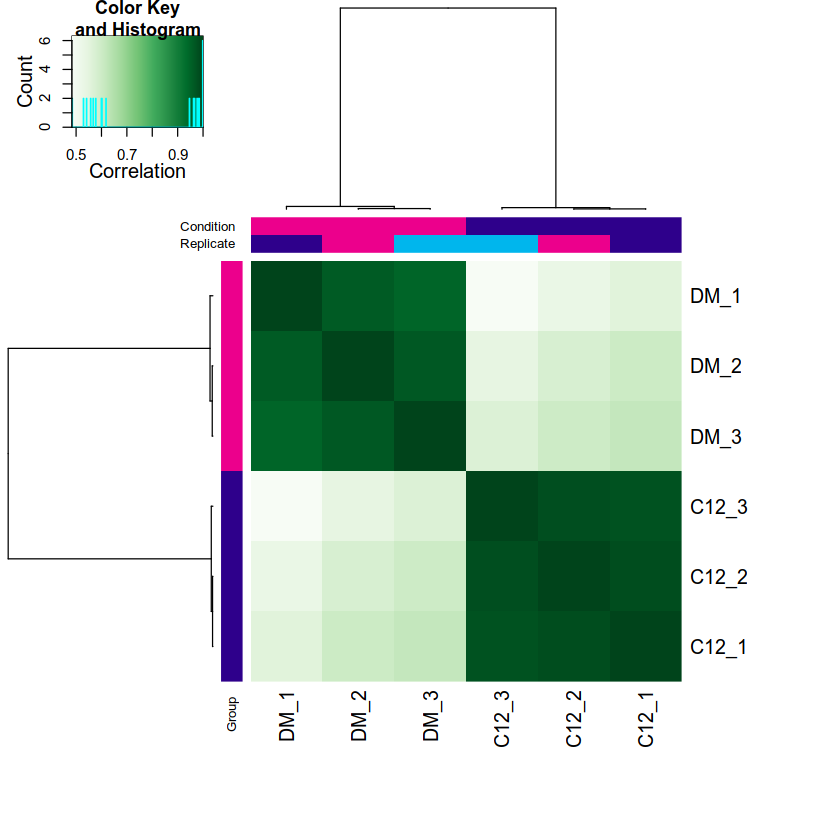

In [83]:
dba.show(dba_diff, bContrasts=TRUE)
plot(dba_diff, contrast=1)

In [84]:
# Generate MA plot
pdf("./diffbind_results/MAplot.pdf")
dba.plotMA(dba_diff, fold = Fold_cutoff, cex.main = 0.8)
abline(h = c(-Fold_cutoff, Fold_cutoff), col = "#ec008c", lty = 5)
dev.off()


png 
  2

In [85]:
# Generate report and annotate peaks
dba_report_all <- dba.report(dba_diff)
peakAnno <- annotatePeak(dba_report_all, TxDb = TxDb.Athaliana.BioMart.plantsmart51, level = "gene")
peakAnno_tb <- as_tibble(peakAnno@anno)
write.csv(peakAnno_tb, file = "./diffbind_results/DiffPeakAnno.csv", row.names = FALSE)


>> preparing features information...		 2023-10-31 13:19:34 
>> identifying nearest features...		 2023-10-31 13:19:34 
>> calculating distance from peak to TSS...	 2023-10-31 13:19:34 
>> assigning genomic annotation...		 2023-10-31 13:19:34 
>> assigning chromosome lengths			 2023-10-31 13:19:35 
>> done...					 2023-10-31 13:19:35 


In [86]:
dba.report(dba_diff, th=.05, bUsePval=TRUE, fold=1)

Warning message:
“Contrast has no explicit design; assuming fold=0.”


GRanges object with 2693 ranges and 6 metadata columns:
        seqnames            ranges strand |      Conc Conc_control Conc_test
           <Rle>         <IRanges>  <Rle> | <numeric>    <numeric> <numeric>
  24110        2 17504656-17505056      * |   9.44647      10.2556   7.43396
  59517        5 24476740-24477140      * |  10.26094      10.9672   8.82059
  55732        5 17549879-17550279      * |  10.08028      10.7985   8.58549
  50089        5   5236534-5236934      * |  10.10095      10.8682   8.35421
  27648        3   4127816-4128216      * |  10.03180      10.7616   8.48236
    ...      ...               ...    ... .       ...          ...       ...
  57749        5 21379699-21380099      * |   7.48962      6.62886   8.02501
  17014        2   3389288-3389688      * |   8.46645      8.90341   7.83662
  17022        2   3405346-3405746      * |   7.83904      8.27430   7.21276
  17064        2   3499903-3500303      * |   7.13587      7.61830   6.40587
  17013        2   3

In [87]:
dba_report_all

GRanges object with 27134 ranges and 6 metadata columns:
        seqnames            ranges strand |      Conc Conc_control Conc_test
           <Rle>         <IRanges>  <Rle> | <numeric>    <numeric> <numeric>
  24110        2 17504656-17505056      * |   9.44647      10.2556   7.43396
  59517        5 24476740-24477140      * |  10.26094      10.9672   8.82059
  55732        5 17549879-17550279      * |  10.08028      10.7985   8.58549
  50089        5   5236534-5236934      * |  10.10095      10.8682   8.35421
  27648        3   4127816-4128216      * |  10.03180      10.7616   8.48236
    ...      ...               ...    ... .       ...          ...       ...
  36349        3 21353561-21353961      * |   8.08328      7.94691   8.20787
  18219        2   6860266-6860666      * |   8.00752      7.85666   8.14408
  14531        1 28390216-28390616      * |   8.82231      8.71699   8.92046
  33630        3 16513300-16513700      * |   8.57712      8.45883   8.68644
  59487        5 24

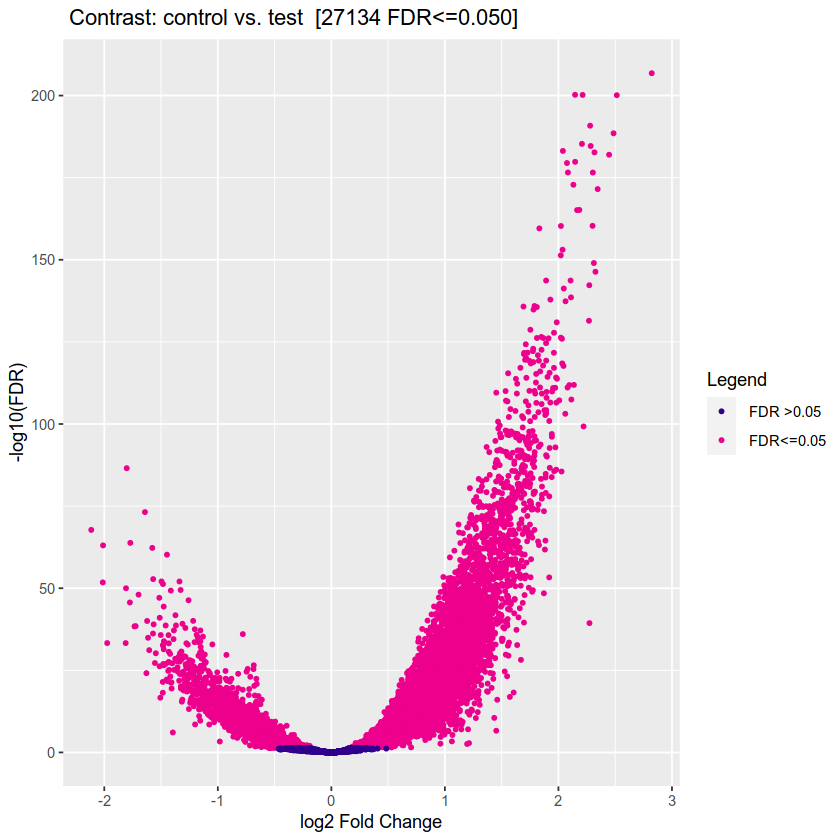

In [88]:
dba.plotVolcano(dba_diff)

In [89]:
dba_diff

6 Samples, 60913 sites in matrix:
     ID Condition Replicate    Reads FRiP
1 C12_1   control         1 69772433 0.44
2 C12_2   control         2 49161614 0.44
3 C12_3   control         3 40808874 0.43
4  DM_1      test         1 56048498 0.39
5  DM_2      test         2 66216104 0.39
6  DM_3      test         3 58854332 0.39

1 Contrast:
    Group Samples Group2 Samples2 DB.DESeq2
1 control       3   test        3     27134

Generating report-based DBA object...



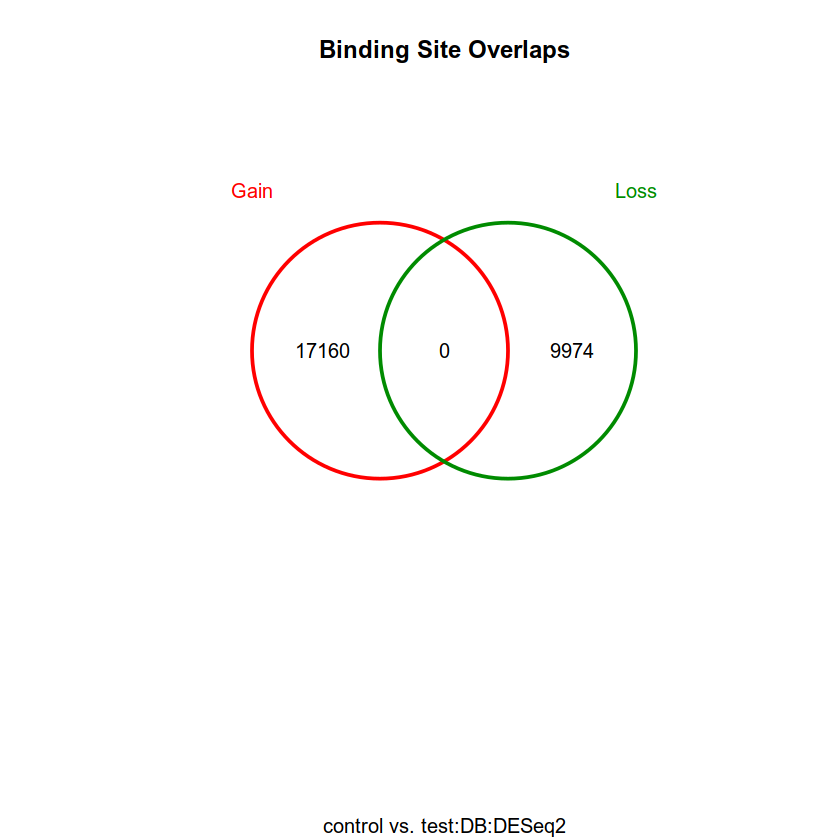

In [90]:
dba.plotVenn(dba_diff, contrast=1, bDB=TRUE,bGain=TRUE, bLoss=TRUE, bAll=FALSE)

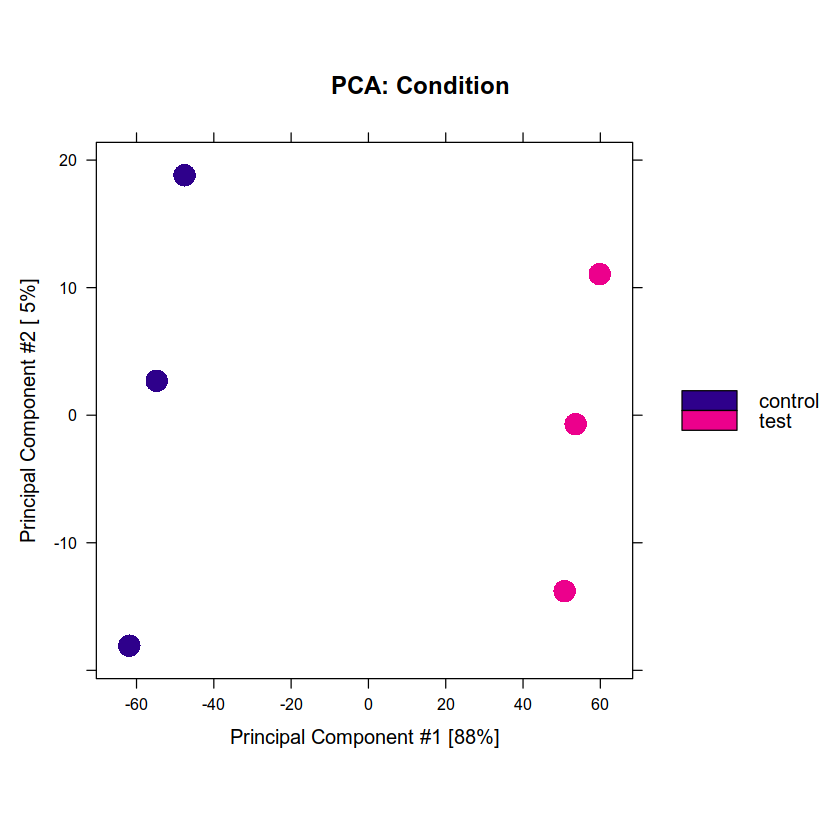

In [91]:
dba.plotPCA(dba_diff)

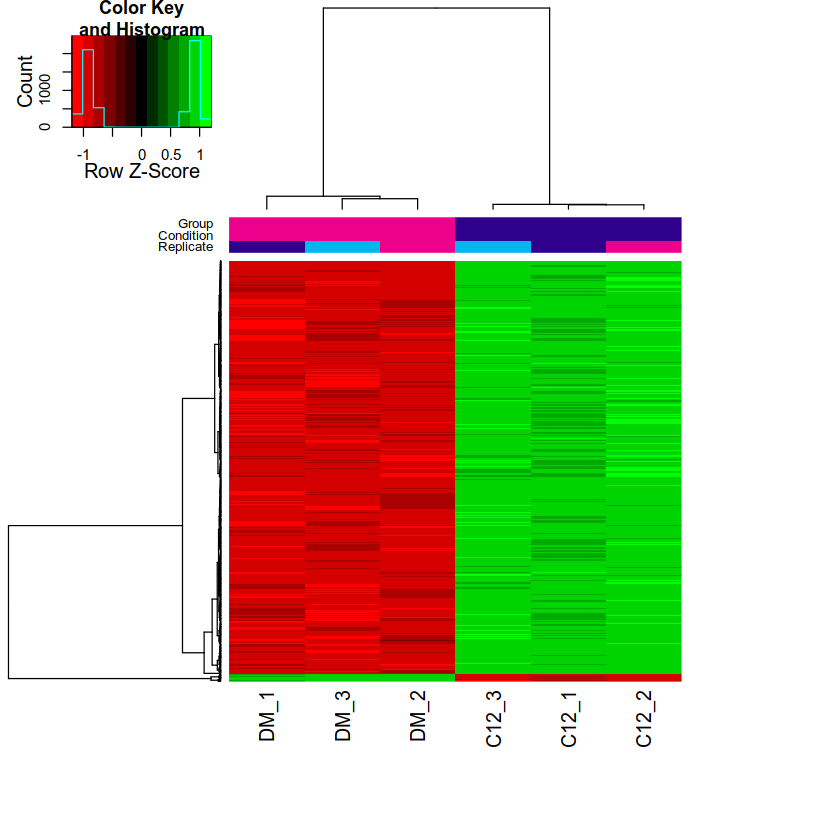

In [92]:
hmap <- colorRampPalette(c("red", "black", "green"))(n = 13)

readscores <- dba.plotHeatmap(dba_diff, contrast=1, correlations=FALSE, 
                              scale="row", colScheme= hmap)

In [93]:
peakAnno_tb %>% arrange(desc(Fold)) %>% filter(FDR < 0.05, Fold > 1)

seqnames,start,end,width,strand,Conc,Conc_control,Conc_test,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS
<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
2,17504656,17505056,401,*,9.446474,10.255607,7.433959,2.821648,2.595040e-212,1.580717e-207,Promoter (<=1kb),2,17504551,17504932,382,2,AT2G09320,0
5,5236534,5236934,401,*,10.100950,10.868203,8.354208,2.513995,5.132094e-205,7.815281e-201,Promoter (<=1kb),5,5236634,5236879,246,1,AT5G02495,0
4,18125843,18126243,401,*,9.619929,10.382916,7.897316,2.485600,3.006165e-193,3.051909e-189,Promoter (<=1kb),4,18126057,18126829,773,1,AT4G38850,0
1,28052156,28052556,401,*,9.858521,10.615454,8.169354,2.446100,1.881725e-186,1.042014e-182,Promoter (<=1kb),1,28053030,28054149,1120,1,AT1G74670,-474
4,16582807,16583207,401,*,9.612132,10.353010,8.007446,2.345564,8.391656e-176,3.006829e-172,Promoter (<=1kb),4,16582183,16583075,893,2,AT4G34760,0
3,7104221,7104621,401,*,9.701408,10.439067,8.112976,2.326091,1.891941e-150,4.432454e-147,Promoter (<=1kb),3,7103817,7104250,434,1,AT3G20362,404
3,16815083,16815483,401,*,9.972131,10.708388,8.390705,2.317682,3.242410e-187,1.975049e-183,Promoter (1-2kb),3,16816721,16824210,7490,1,AT3G45780,-1238
4,18129542,18129942,401,*,9.352298,10.087643,7.775411,2.312233,3.994489e-153,9.732652e-150,Promoter (<=1kb),4,18130237,18131284,1048,1,AT4G38860,-295
5,17828931,17829331,401,*,10.133060,10.866877,8.563736,2.303142,6.790448e-181,2.757510e-177,Promoter (2-3kb),5,17829618,17831336,1719,2,AT5G44260,2005


In [94]:
peakAnno_tb %>% arrange(Fold) %>% filter(FDR < 0.05, Fold < -1)

seqnames,start,end,width,strand,Conc,Conc_control,Conc_test,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS
<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,22834408,22834808,401,*,8.713925,7.299625,9.414195,-2.114570,1.191069e-70,1.744028e-68,Promoter (<=1kb),1,22834539,22834809,271,2,AT1G08437,1
2,13063845,13064245,401,*,8.068784,6.736310,8.749480,-2.013170,2.080083e-54,1.682657e-52,Promoter (2-3kb),2,13058250,13061675,3426,2,AT2G30660,-2170
5,4903007,4903407,401,*,8.415900,7.085315,9.096128,-2.010812,7.367265e-66,9.139761e-64,Promoter (<=1kb),5,4904290,4907094,2805,1,AT5G15130,-883
1,22832967,22833367,401,*,7.755770,6.454190,8.428710,-1.974519,1.305676e-35,4.983249e-34,Promoter (<=1kb),1,22833811,22834062,252,2,AT1G08433,695
2,18077801,18078201,401,*,7.742206,6.568933,8.380591,-1.811659,1.328906e-35,5.068731e-34,Promoter (<=1kb),2,18076166,18077517,1352,2,AT2G43570,-284
1,20519947,20520347,401,*,8.300969,7.130016,8.938692,-1.808676,1.331127e-52,1.018630e-50,Distal Intergenic,1,20516916,20517531,616,1,AT1G55010,3031
1,13367464,13367864,401,*,9.217477,8.051348,9.853820,-1.802472,9.572374e-90,2.844303e-87,Promoter (2-3kb),1,13362962,13365172,2211,2,AT1G35910,-2292
3,22652671,22653071,401,*,8.263763,7.119510,8.893773,-1.774263,3.385625e-48,2.180006e-46,Promoter (1-2kb),3,22650159,22651636,1478,2,AT3G61190,-1035
4,2531644,2532044,401,*,8.832009,7.690571,9.461196,-1.770625,1.215808e-66,1.555852e-64,Promoter (<=1kb),4,2532906,2535386,2481,1,AT4G04960,-862


In [95]:
peakAnno_tb %>% arrange(desc(Fold))

seqnames,start,end,width,strand,Conc,Conc_control,Conc_test,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS
<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
2,17504656,17505056,401,*,9.446474,10.255607,7.433959,2.821648,2.595040e-212,1.580717e-207,Promoter (<=1kb),2,17504551,17504932,382,2,AT2G09320,0
5,5236534,5236934,401,*,10.100950,10.868203,8.354208,2.513995,5.132094e-205,7.815281e-201,Promoter (<=1kb),5,5236634,5236879,246,1,AT5G02495,0
4,18125843,18126243,401,*,9.619929,10.382916,7.897316,2.485600,3.006165e-193,3.051909e-189,Promoter (<=1kb),4,18126057,18126829,773,1,AT4G38850,0
1,28052156,28052556,401,*,9.858521,10.615454,8.169354,2.446100,1.881725e-186,1.042014e-182,Promoter (<=1kb),1,28053030,28054149,1120,1,AT1G74670,-474
4,16582807,16583207,401,*,9.612132,10.353010,8.007446,2.345564,8.391656e-176,3.006829e-172,Promoter (<=1kb),4,16582183,16583075,893,2,AT4G34760,0
3,7104221,7104621,401,*,9.701408,10.439067,8.112976,2.326091,1.891941e-150,4.432454e-147,Promoter (<=1kb),3,7103817,7104250,434,1,AT3G20362,404
3,16815083,16815483,401,*,9.972131,10.708388,8.390705,2.317682,3.242410e-187,1.975049e-183,Promoter (1-2kb),3,16816721,16824210,7490,1,AT3G45780,-1238
4,18129542,18129942,401,*,9.352298,10.087643,7.775411,2.312233,3.994489e-153,9.732652e-150,Promoter (<=1kb),4,18130237,18131284,1048,1,AT4G38860,-295
5,17828931,17829331,401,*,10.133060,10.866877,8.563736,2.303142,6.790448e-181,2.757510e-177,Promoter (2-3kb),5,17829618,17831336,1719,2,AT5G44260,2005


In [96]:
peakAnno_tb %>% pull(seqnames) %>% unique

[1] 2 5 3 4 1
Levels: 1 2 3 4 5

In [97]:
library("org.At.tair.db")
library("clusterProfiler")

In [98]:
# Assume peakAnno_tb is your data frame
# Filter for Fold > 1 and Fold < -1
genes_upregulated <- subset(peakAnno_tb, Fold > 1)$geneId
genes_downregulated <- subset(peakAnno_tb, Fold < -1)$geneId

# Ensure the gene IDs are unique
genes_upregulated <- unique(genes_upregulated)
genes_downregulated <- unique(genes_downregulated)

# Now, perform GO enrichment analysis

# For upregulated genes
ego_up <- enrichGO(gene         = genes_upregulated,
                   keyType = 'TAIR',
                   OrgDb         = org.At.tair.db,  # Assuming Arabidopsis thaliana
                   ont           = "BP",            # Biological Process
                   pAdjustMethod = "BH",            # Benjamini & Hochberg
                   qvalueCutoff  = 0.05)

# For downregulated genes
ego_down <- enrichGO(gene         = genes_downregulated,
                         keyType = 'TAIR',
                     OrgDb         = org.At.tair.db,  # Assuming Arabidopsis thaliana
                     ont           = "BP",            # Biological Process
                     pAdjustMethod = "BH",            # Benjamini & Hochberg
                     qvalueCutoff  = 0.05)

# To view the results, you can use the summary function
summary(ego_up)
summary(ego_down)


Warning message in summary(ego_up):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0009639,GO:0009639,response to red or far red light,87/1632,399/25784,9.649856e-25,1.716709e-21,1.403800e-21,AT1G67900/AT4G38860/AT3G61750/AT3G62650/AT5G66580/AT3G58850/AT2G44940/AT2G43010/AT1G02350/AT1G32900/AT1G14920/AT1G69160/AT1G01520/AT1G15550/AT2G05070/AT5G28490/AT2G31380/AT3G62090/AT4G36930/AT5G66590/AT5G61270/AT1G18400/AT1G73480/AT5G15160/AT3G23880/AT2G46590/AT4G16780/AT2G05100/AT4G32980/AT1G69530/AT4G16490/AT3G14870/AT1G05870/AT4G28240/AT2G45850/AT3G27690/AT4G28330/AT1G76500/AT1G03130/AT3G27170/AT2G25080/AT2G29090/AT1G20900/AT3G05936/AT5G52250/AT3G11690/AT5G57760/AT5G23060/AT2G29670/AT5G39860/AT4G38740/AT4G27657/AT1G75180/AT1G75590/AT1G59740/AT3G04140/AT1G68500/AT1G21050/AT4G15550/AT5G67390/AT4G18220/AT3G47295/AT1G09530/AT4G27310/AT1G78260/AT5G62170/AT2G33360/AT4G39070/AT1G28670/AT1G78600/AT1G06980/AT4G14690/AT1G72030/AT5G19970/AT1G77200/AT4G14130/AT4G25260/AT5G06790/AT1G73870/AT4G36110/AT5G39080/AT1G10470/AT1G75540/AT3G28860/AT2G20180/AT4G36105/AT4G38960,87
GO:0009733,GO:0009733,response to auxin,70/1632,417/25784,6.366056e-14,5.662607e-11,4.630468e-11,AT5G43700/AT4G38850/AT2G21210/AT4G34760/AT4G38860/AT5G66580/AT5G17300/AT2G43010/AT1G19840/AT1G75580/AT1G70944/AT2G33860/AT1G69160/AT5G37020/AT5G63160/AT1G30330/AT1G23080/AT2G22240/AT3G23050/AT5G56860/AT5G64780/AT1G12820/AT1G04240/AT4G16780/AT3G62980/AT1G54990/AT5G18030/AT4G37610/AT3G15540/AT2G42900/AT4G39403/AT3G46110/AT2G34650/AT3G13510/AT4G09890/AT1G53230/AT3G01490/AT3G25717/AT5G12330/AT4G34770/AT5G64770/AT1G75590/AT2G28350/AT3G03830/AT4G03190/AT3G07010/AT2G06850/AT4G09460/AT5G09810/AT1G31710/AT4G18710/AT4G37290/AT5G43870/AT1G77690/AT1G76610/AT1G70940/AT5G54510/AT4G36110/AT4G34790/AT1G75500/AT2G01960/AT1G52565/AT1G56650/AT3G12670/AT3G01130/AT3G55120/AT5G18020/AT5G12050/AT1G19850/AT3G28860,70
GO:0010016,GO:0010016,shoot system morphogenesis,49/1632,247/25784,7.251177e-13,4.299948e-10,3.516185e-10,AT5G03680/AT4G12970/AT3G63440/AT2G34710/AT5G43020/AT1G01030/AT1G68130/AT2G26330/AT3G28040/AT4G31890/AT5G67420/AT5G53400/AT4G16780/AT5G10310/AT5G19730/AT1G62500/AT1G80490/AT4G14723/AT2G37630/AT3G61460/AT3G52770/AT2G31070/AT1G53230/AT2G30370/AT2G40475/AT1G80133/AT5G62230/AT3G15030/AT5G07240/AT1G27370/AT4G36870/AT3G50660/AT1G34245/AT3G61920/AT2G01940/AT5G23100/AT4G18710/AT5G06710/AT1G25250/AT2G23760/AT1G73870/AT1G36160/AT1G68480/AT2G41820/AT4G01500/AT5G53210/AT3G61970/AT5G62710/AT2G46870,49
GO:0048580,GO:0048580,regulation of post-embryonic development,67/1632,425/25784,4.320112e-12,1.921370e-09,1.571157e-09,AT2G20570/AT4G26000/AT5G60910/AT3G61750/AT5G03680/AT4G12970/AT1G14920/AT5G05700/AT3G03450/AT5G46910/AT2G31380/AT4G39400/AT4G36930/AT1G33240/AT3G47620/AT3G21890/AT5G56860/AT5G48890/AT1G15570/AT2G46590/AT1G62380/AT2G22540/AT3G12915/AT2G03070/AT1G70410/AT1G05870/AT5G17800/AT5G18560/AT2G45660/AT5G13290/AT5G23280/AT1G68490/AT3G05936/AT2G30370/AT5G24930/AT5G64770/AT1G21050/AT4G15248/AT1G13260/AT1G34245/AT3G01500/AT2G22840/AT4G24620/AT5G44190/AT4G27310/AT1G78070/AT4G21750/AT4G39070/AT1G78600/AT4G14690/AT2G45190/AT1G77200/AT4G31820/AT3G23210/AT1G25250/AT5G05690/AT1G68480/AT1G65480/AT1G42550/AT5G59990/AT2G43680/AT5G53210/AT3G50870/AT4G04890/AT1G22190/AT2G20180/AT4G38960,67
GO:0007389,GO:0007389,pattern specification process,54/1632,316/25784,2.329878e-11,8.289705e-09,6.778718e-09,AT5G51560/AT5G03680/AT4G12970/AT2G34710/AT5G55250/AT2G26330/AT1G20330/AT1G33240/AT1G23080/AT5G10150/AT5G53400/AT3G61310/AT5G19730/AT1G62500/AT5G60200/AT1G10640/AT2G37630/AT3G52770/AT1G44760/AT1G77750/AT4G39403/AT3G46110/AT1G24260/AT5G22930/AT5G62940/AT2G28350/AT1G10657/AT5G59790/AT1G15500/AT3G54220/AT1G70550/AT3G02130/AT1G52300/AT5G23100/AT2G45190/AT3G58790/AT5G43870/AT5G06790/AT3G45610/AT1G70940/AT3G53190/AT5G15780/AT1G01380/AT1G68480/AT1G67040/AT2G41820/AT5G28640/AT2G42800/AT4G14200/AT1G11120/AT3G50780/AT2G26580/AT1G51190/AT1G19850,54
GO:0042546,GO:0042546,cell wall biogenesis,71/

Warning message in summary(ego_down):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0009627,GO:0009627,systemic acquired resistance,13/238,133/25784,3.412325e-10,2.470524e-07,2.047395e-07,AT4G15610/AT2G18690/AT3G01420/AT5G26920/AT2G43570/AT5G60900/AT5G13320/AT1G74710/AT2G14610/AT3G13950/AT1G65483/AT1G73805/AT5G45110,13
GO:0044550,GO:0044550,secondary metabolite biosynthetic process,12/238,208/25784,5.843777e-07,2.115447e-04,1.753133e-04,AT2G18690/AT2G42350/AT3G13610/AT4G17785/AT4G27260/AT1G67980/AT1G80820/AT1G61820/AT1G66230/AT3G32980/AT1G51840/AT4G13660,12
GO:0009751,GO:0009751,response to salicylic acid,17/238,459/25784,1.454118e-06,3.509272e-04,2.908236e-04,AT4G15610/AT2G18690/AT5G18270/AT3G01420/AT5G45500/AT3G61190/AT5G06320/AT5G60900/AT1G15380/AT5G22570/AT3G13950/AT1G65483/AT1G76930/AT3G08760/AT5G45110/AT1G53625/AT1G14780,17
GO:0001666,GO:0001666,response to hypoxia,13/238,324/25784,1.105785e-05,1.528357e-03,1.266594e-03,AT4G15610/AT1G57630/AT5G06320/AT5G26920/AT1G13300/AT1G10140/AT1G14540/AT5G15120/AT1G53620/AT1G26410/AT1G77145/AT3G08760/AT1G53625,13
GO:0009404,GO:0009404,toxin metabolic process,8/238,115/25784,1.185574e-05,1.528357e-03,1.266594e-03,AT4G15610/AT2G18690/AT3G46280/AT1G69930/AT4G27260/AT2G27389/AT3G13950/AT1G10140,8
GO:0036293,GO:0036293,response to decreased oxygen levels,13/238,332/25784,1.431559e-05,1.528357e-03,1.266594e-03,AT4G15610/AT1G57630/AT5G06320/AT5G26920/AT1G13300/AT1G10140/AT1G14540/AT5G15120/AT1G53620/AT1G26410/AT1G77145/AT3G08760/AT1G53625,13
GO:0070482,GO:0070482,response to oxygen levels,13/238,333/25784,1.477693e-05,1.528357e-03,1.266594e-03,AT4G15610/AT1G57630/AT5G06320/AT5G26920/AT1G13300/AT1G10140/AT1G14540/AT5G15120/AT1G53620/AT1G26410/AT1G77145/AT3G08760/AT1G53625,13
GO:0090693,GO:0090693,plant organ senescence,11/238,245/25784,1.888340e-05,1.708948e-03,1.416255e-03,AT4G15610/AT2G18690/AT5G18270/AT2G43570/AT3G22910/AT5G44610/AT2G37750/AT3G50030/AT2G34610/AT1G63245/AT4G18425,11
GO:0010150,GO:0010150,leaf senescence,10/238,229/25784,5.716631e-05,4.342731e-03,3.598948e-03,AT4G15610/AT2G18690/AT5G18270/AT2G43570/AT3G22910/AT5G44610/AT2G37750/AT3G50030/AT2G34610/AT1G63245,10


In [99]:
genes_upregulated %>% length

[1] 2048

In [100]:
genes_downregulated %>% length

[1] 279

In [101]:
library("ggplot2")

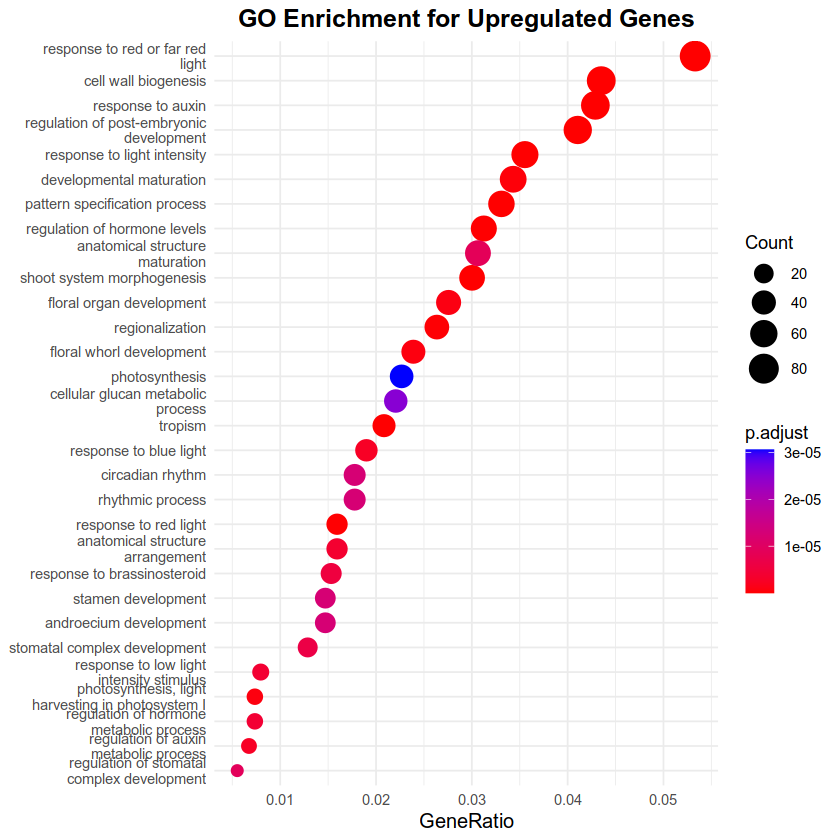

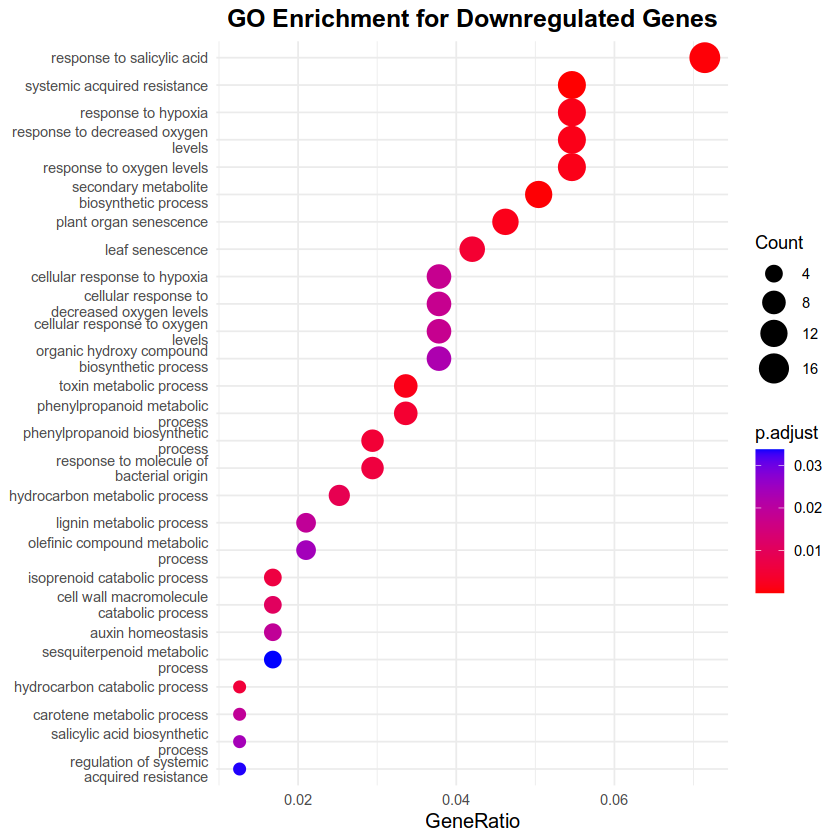

In [102]:
# Dot plot for upregulated genes
dotplot(ego_up, showCategory=30) + 
  theme_minimal() +
  ggtitle("GO Enrichment for Upregulated Genes") +
  theme(plot.title = element_text(hjust = 0.5, size=15, face="bold"),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12))

# Save the upregulated dot plot to a file if needed
ggsave("GO_enrichment_upregulated_genes.png", width = 7, height = 4)

# Dot plot for downregulated genes
dotplot(ego_down, showCategory=30) + 
  theme_minimal() +
  ggtitle("GO Enrichment for Downregulated Genes") +
  theme(plot.title = element_text(hjust = 0.5, size=15, face="bold"),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12))

# Save the downregulated dot plot to a file if needed
ggsave("./diffbind_results/GO_enrichment_downregulated_genes.png", width = 7, height = 4)
